In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from tools.tools import open_file, DF_TIME, DF_DATA_POINTS, DF_CHANNEL
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram
import numpy as np
from scipy import stats

import os

time = 'time'
signal = 'signal'
base_path = '/home/schwan/syncthing/PD_MN/Experiments/HPLC/20240304/'

In [2]:
files = [
    ('ID',	'Key',	'Conc (mM),',	'Pos',	'Path'),
    (1,	'Acetate',	100,	1,	'1LongColumnLacAcetateRiboflavin2.met002-Rep1.dat.asc'),
    (2,	'Acetate',	100,	1,	'1LongColumnLacAcetateRiboflavin2.met002-Rep2.dat.asc'),
    (3,	'Acetate',	100,	1,	'1LongColumnLacAcetateRiboflavin2.met002-Rep3.dat.asc'),
    (4,	'Acetate',	50,	2,	'2LongColumnLacAcetateRiboflavin2.met003-Rep1.dat.asc'),
    (5,	'Acetate',	50,	2,	'2LongColumnLacAcetateRiboflavin2.met003-Rep2.dat.asc'),
    (6,	'Acetate',	50,	2,	'2LongColumnLacAcetateRiboflavin2.met003-Rep3.dat.asc'),
    (7,	'Acetate',	25,	3,	'3LongColumnLacAcetateRiboflavin2.met004-Rep1.dat.asc'),
    (8,	'Acetate',	25,	3,	'3LongColumnLacAcetateRiboflavin2.met004-Rep2.dat.asc'),
    (9,	'Acetate',	25,	3,	'3LongColumnLacAcetateRiboflavin2.met004-Rep3.dat.asc'),
    (10,	'Acetate',	12.5,	4,	'4LongColumnLacAcetateRiboflavin2.met005-Rep1.dat.asc'),
    (11,	'Acetate',	12.5,	4,	'4LongColumnLacAcetateRiboflavin2.met005-Rep2.dat.asc'),
    (12,	'Acetate',	12.5,	4,	'4LongColumnLacAcetateRiboflavin2.met005-Rep3.dat.asc'),
    (13,	'Acetate',	6.25,	5,	'5LongColumnLacAcetateRiboflavin2.met006-Rep1.dat.asc'),
    (14,	'Acetate',	6.25,	5,	'5LongColumnLacAcetateRiboflavin2.met006-Rep2.dat.asc'),
    (15,	'Acetate',	6.25,	5,	'5LongColumnLacAcetateRiboflavin2.met006-Rep3.dat.asc'),
    (16,	'Acetate',	1.5625,	7,	'7LongColumnLacAcetateRiboflavin2.met007-Rep1.dat.asc'),
    (17,	'Acetate',	1.5625,	7,	'7LongColumnLacAcetateRiboflavin2.met007-Rep2.dat.asc'),
    (18,	'Acetate',	1.5625,	7,	'7LongColumnLacAcetateRiboflavin2.met007-Rep3.dat.asc'),
    (19,	'Acetate',	0.78125,	8,	'8LongColumnLacAcetateRiboflavin2.met008-Rep1.dat.asc'),
    (20,	'Acetate',	0.78125,	8,	'8LongColumnLacAcetateRiboflavin2.met008-Rep2.dat.asc'),
    (21,	'Acetate',	0.78125,	8,	'8LongColumnLacAcetateRiboflavin2.met008-Rep3.dat.asc'),
    (22,	'Acetate',	0.390625,	9,	'9LongColumnLacAcetateRiboflavin2.met009-Rep1.dat.asc'),
    (23,	'Acetate',	0.390625,	9,	'9LongColumnLacAcetateRiboflavin2.met009-Rep2.dat.asc'),
    (24,	'Acetate',	0.390625,	9,	'9LongColumnLacAcetateRiboflavin2.met009-Rep3.dat.asc'),
    (25,	'Acetate',	0.1953125,	10,	'10LongColumnLacAcetateRiboflavin2.met010-Rep1.dat.asc'),
    (26,	'Acetate',	0.1953125,	10,	'10LongColumnLacAcetateRiboflavin2.met010-Rep2.dat.asc'),
    (27,	'Acetate',	0.1953125,	10,	'10LongColumnLacAcetateRiboflavin2.met010-Rep3.dat.asc'),
    (28,	'Solvent',	np.NaN,	15,	'15LongColumnLacAcetateRiboflavin2.met001.dat.asc'),
    (29,	'Solvent',	np.NaN,	15,	'15LongColumnLacAcetateRiboflavin2.met020.dat.asc'),
    (30,	'Solvent',	np.NaN,	16,	'16LongColumnLacAcetateRiboflavin2.met029.dat.asc'),
    (31,	'Solvent',	np.NaN,	18,	'18LongColumnLacAcetateRiboflavin2.met038-Rep1.dat.asc'),
    (32,	'Solvent',	np.NaN,	18,	'18LongColumnLacAcetateRiboflavin2.met038-Rep2.dat.asc'),
    (33,	'Solvent',	np.NaN,	18,	'18LongColumnLacAcetateRiboflavin2.met038-Rep3.dat.asc'),
    (34,	'Solvent',	np.NaN,	18,	'18LongColumnLacAcetateRiboflavin2.met038-Rep4.dat.asc'),
    (35,	'Solvent',	np.NaN,	18,	'18LongColumnLacAcetateRiboflavin2.met038-Rep5.dat.asc'),
    (36,	'Lactate',	100,	25,	'25LongColumnLacAcetateRiboflavin2.met011-Rep1.dat.asc'),
    (37,	'Lactate',	100,	25,	'25LongColumnLacAcetateRiboflavin2.met011-Rep2.dat.asc'),
    (38,	'Lactate',	100,	25,	'25LongColumnLacAcetateRiboflavin2.met011-Rep3.dat.asc'),
    (39,	'Lactate',	50,	26,	'26LongColumnLacAcetateRiboflavin2.met012-Rep1.dat.asc'),
    (40,	'Lactate',	50,	26,	'26LongColumnLacAcetateRiboflavin2.met012-Rep2.dat.asc'),
    (41,	'Lactate',	50,	26,	'26LongColumnLacAcetateRiboflavin2.met012-Rep3.dat.asc'),
    (42,	'Lactate',	25,	27,	'27LongColumnLacAcetateRiboflavin2.met013-Rep1.dat.asc'),
    (43,	'Lactate',	25,	27,	'27LongColumnLacAcetateRiboflavin2.met013-Rep2.dat.asc'),
    (44,	'Lactate',	25,	27,	'27LongColumnLacAcetateRiboflavin2.met013-Rep3.dat.asc'),
    (45,	'Lactate',	12.5,	28,	'28LongColumnLacAcetateRiboflavin2.met014-Rep1.dat.asc'),
    (46,	'Lactate',	12.5,	28,	'28LongColumnLacAcetateRiboflavin2.met014-Rep2.dat.asc'),
    (47,	'Lactate',	12.5,	28,	'28LongColumnLacAcetateRiboflavin2.met014-Rep3.dat.asc'),
    (48,	'Lactate',	6.25,	29,	'29LongColumnLacAcetateRiboflavin2.met015-Rep1.dat.asc'),
    (49,	'Lactate',	6.25,	29,	'29LongColumnLacAcetateRiboflavin2.met015-Rep2.dat.asc'),
    (50,	'Lactate',	6.25,	29,	'29LongColumnLacAcetateRiboflavin2.met015-Rep3.dat.asc'),
    (51,	'Lactate',	3.125,	30,	'30LongColumnLacAcetateRiboflavin2.met016-Rep1.dat.asc'),
    (52,	'Lactate',	3.125,	30,	'30LongColumnLacAcetateRiboflavin2.met016-Rep2.dat.asc'),
    (53,	'Lactate',	3.125,	30,	'30LongColumnLacAcetateRiboflavin2.met016-Rep3.dat.asc'),
    (54,	'Lactate',	1.5625,	31,	'31LongColumnLacAcetateRiboflavin2.met017-Rep1.dat.asc'),
    (55,	'Lactate',	1.5625,	31,	'31LongColumnLacAcetateRiboflavin2.met017-Rep2.dat.asc'),
    (56,	'Lactate',	1.5625,	31,	'31LongColumnLacAcetateRiboflavin2.met017-Rep3.dat.asc'),
    (57,	'Lactate',	0.78125,	32,	'32LongColumnLacAcetateRiboflavin2.met018-Rep1.dat.asc'),
    (58,	'Lactate',	0.78125,	32,	'32LongColumnLacAcetateRiboflavin2.met018-Rep2.dat.asc'),
    (59,	'Lactate',	0.78125,	32,	'32LongColumnLacAcetateRiboflavin2.met018-Rep3.dat.asc'),
    (60,	'Lactate',	0.390625,	33,	'33LongColumnLacAcetateRiboflavin2.met019-Rep1.dat.asc'),
    (61,	'Lactate',	0.390625,	33,	'33LongColumnLacAcetateRiboflavin2.met019-Rep2.dat.asc'),
    (62,	'Lactate',	0.390625,	33,	'33LongColumnLacAcetateRiboflavin2.met019-Rep3.dat.asc'),
    (63,	'Ch1',	np.NaN,	37,	'37LongColumnLacAcetateRiboflavin2.met021.dat.asc'),
    (64,	'Ch2',	np.NaN,	38,	'38LongColumnLacAcetateRiboflavin2.met022.dat.asc'),
    (65,	'Ch3',	np.NaN,	39,	'39LongColumnLacAcetateRiboflavin2.met023.dat.asc'),
    (66,	'Ch4',	np.NaN,	40,	'40LongColumnLacAcetateRiboflavin2.met024.dat.asc'),
    (67,	'Ch5',	np.NaN,	41,	'41LongColumnLacAcetateRiboflavin2.met025.dat.asc'),
    (68,	'Ch6',	np.NaN,	42,	'42LongColumnLacAcetateRiboflavin2.met026.dat.asc'),
    (69,	'Ch7',	np.NaN,	43,	'43LongColumnLacAcetateRiboflavin2.met027.dat.asc'),
    (70,	'Ch8',	np.NaN,	44,	'44LongColumnLacAcetateRiboflavin2.met028.dat.asc'),
    (71,	'Niko',	np.NaN,	49,	'49LongColumnLacAcetateRiboflavin2.met030.dat.asc'),
    (72,	'Niko',	np.NaN,	50,	'50LongColumnLacAcetateRiboflavin2.met031.dat.asc'),
    (73,	'Niko',	np.NaN,	51,	'51LongColumnLacAcetateRiboflavin2.met032.dat.asc'),
    (74,	'Niko',	np.NaN,	52,	'52LongColumnLacAcetateRiboflavin2.met033.dat.asc'),
    (75,	'Niko',	np.NaN,	53,	'53LongColumnLacAcetateRiboflavin2.met034.dat.asc'),
    (76,	'Niko',	np.NaN,	54,	'54LongColumnLacAcetateRiboflavin2.met035.dat.asc'),
    (77,	'Niko',	np.NaN,	55,	'55LongColumnLacAcetateRiboflavin2.met036.dat.asc'),
    (78,	'Niko',	np.NaN,	56,	'56LongColumnLacAcetateRiboflavin2.met037.dat.asc'),
]
# ('ID','Key','Conc (mM),','Pos',	'Path')
# ('ID','Pos','Key', 'Conc (mM)',	'Path',),
files = [(a, b, c, d, os.path.join(base_path, e)) for (a, c, d, b, e) in files]
print(os.path.isfile(files[1][4]))

True


Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 161.04it/s]
/home/schwan/PycharmProjects/UMN_HPLC/venv/lib/python3.11/site-packages/hplc/quant.py:1275: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1)
Deconvolving mixture: 100%|██████████| 1/1 [00:00<00:00, 145.76it/s]


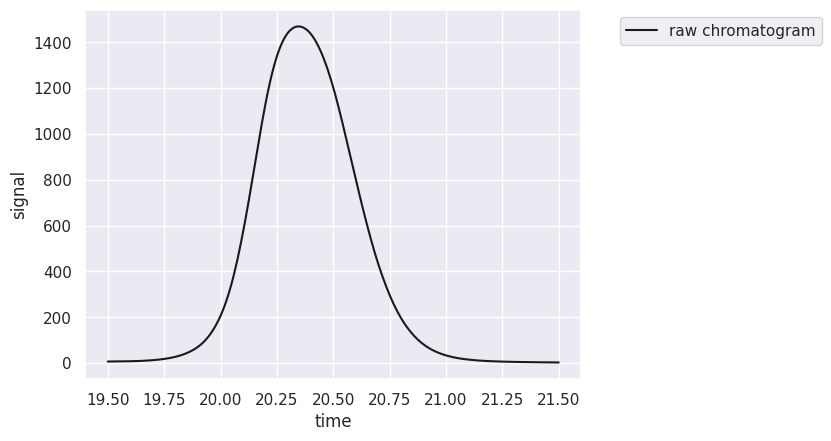

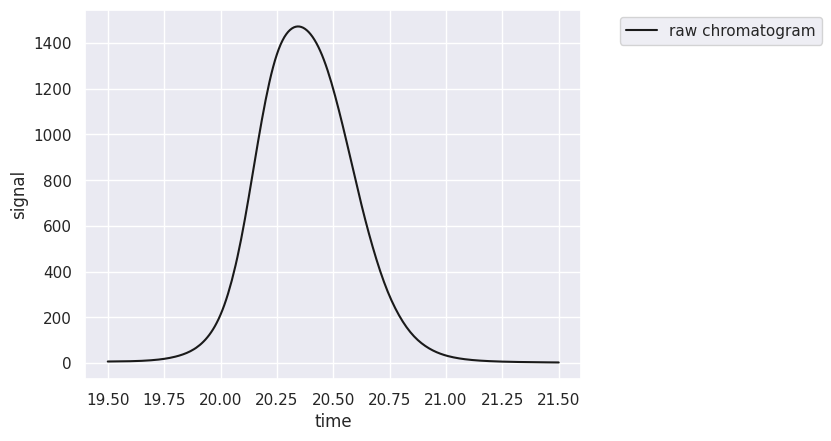

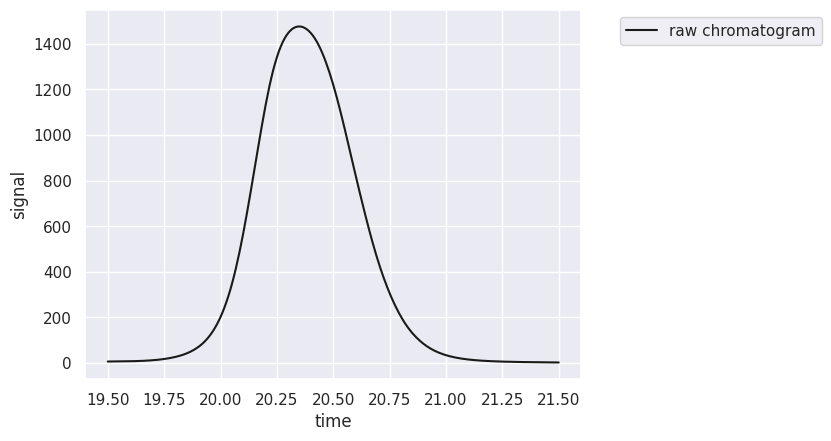

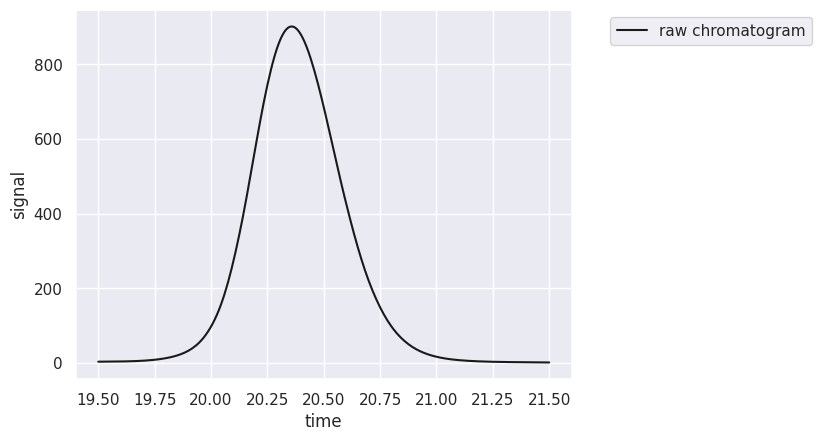

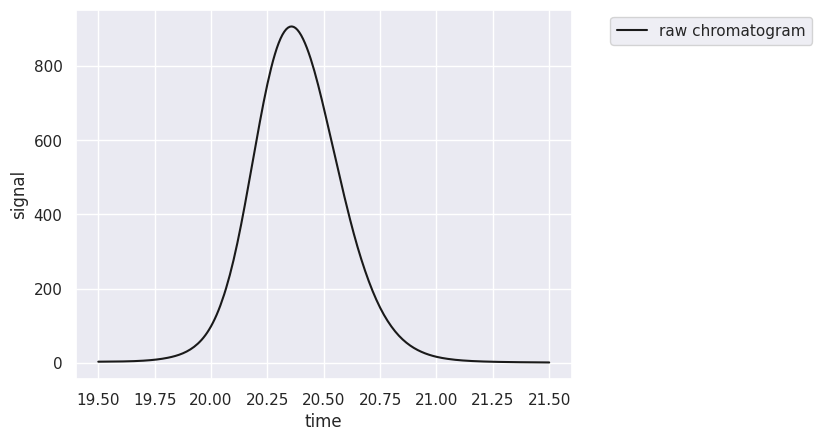

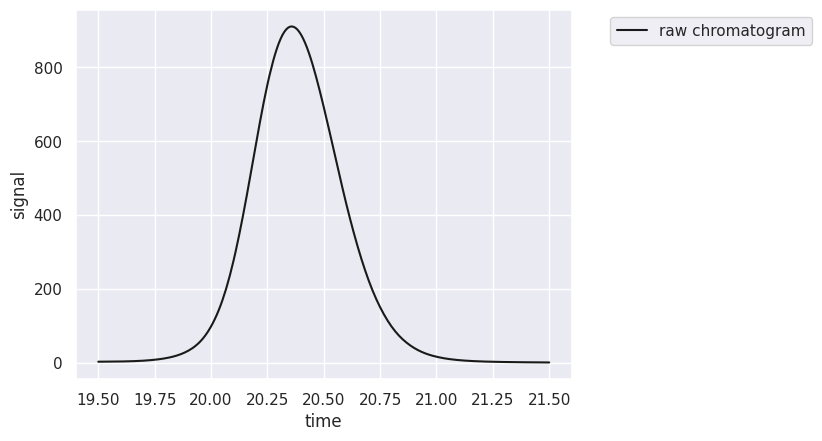

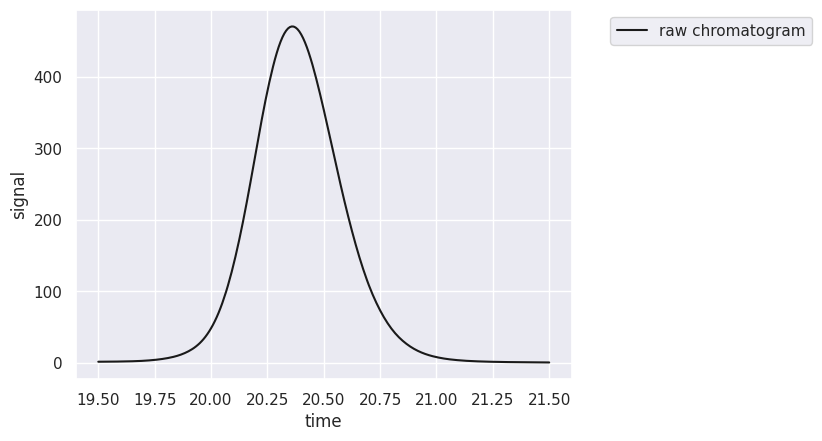

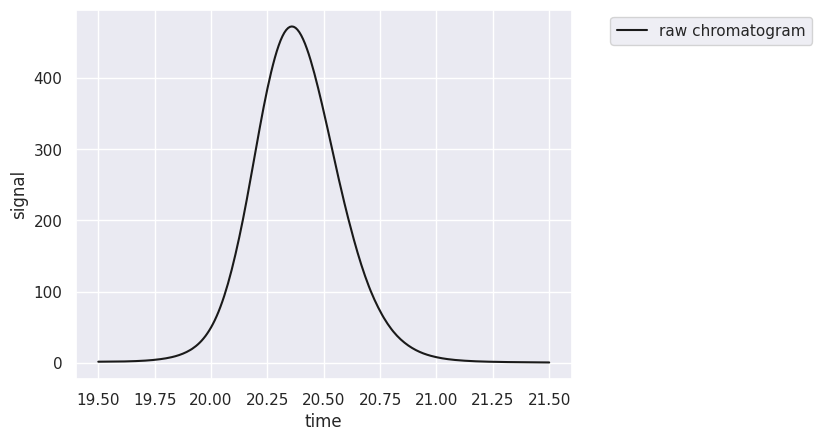

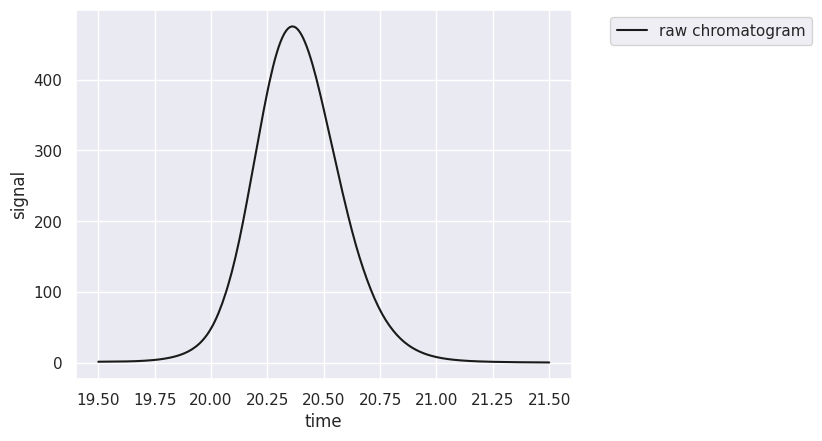

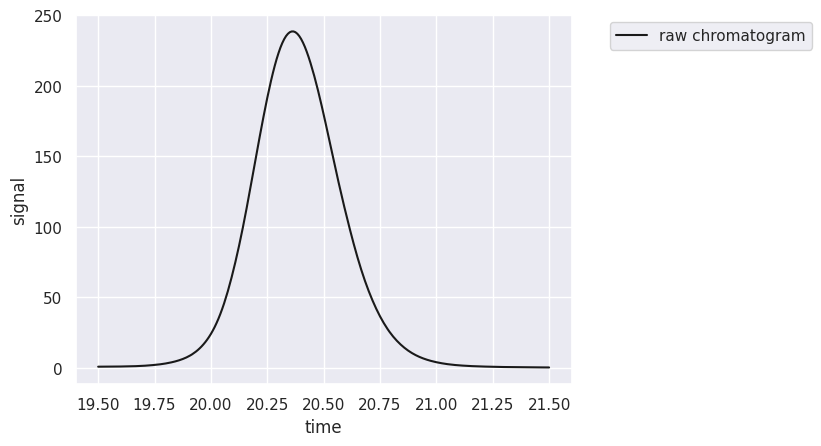

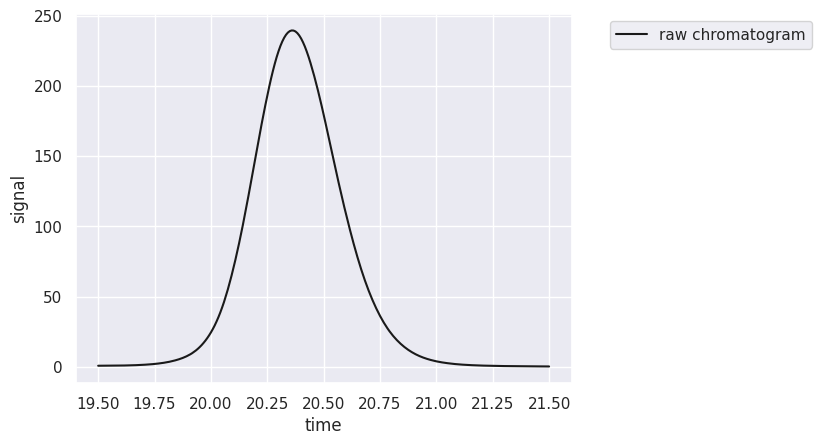

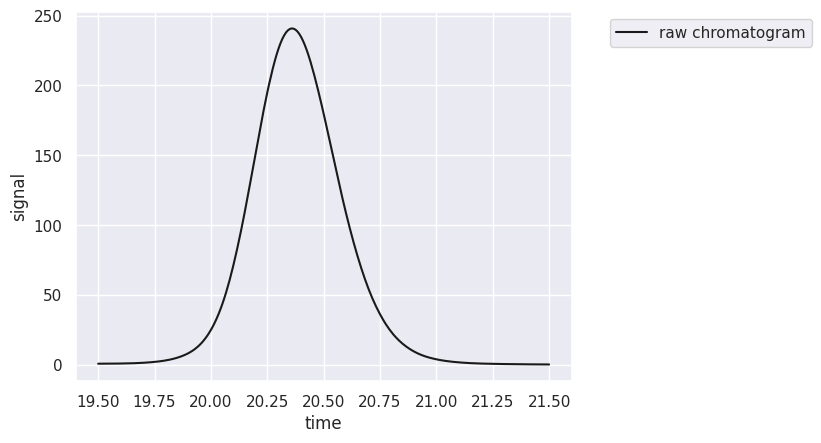

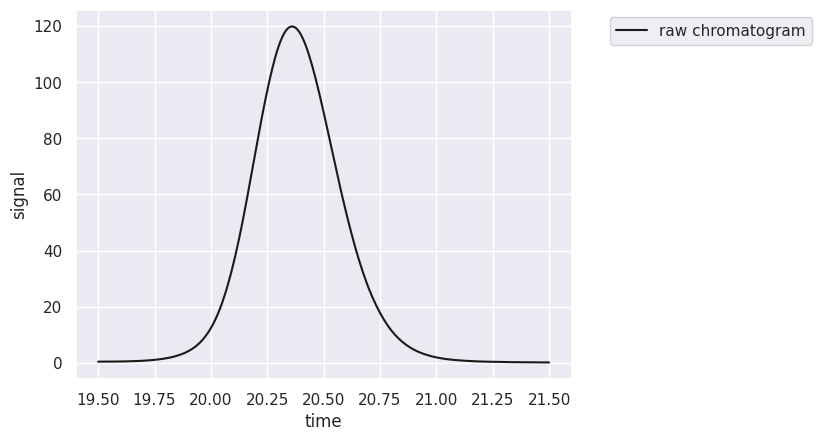

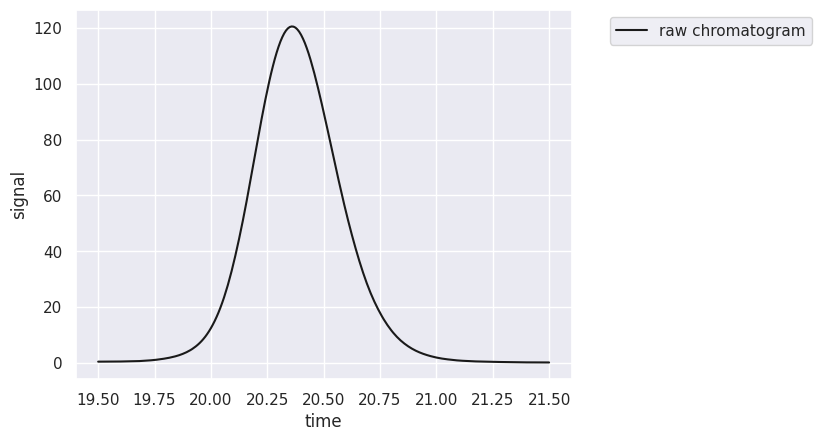

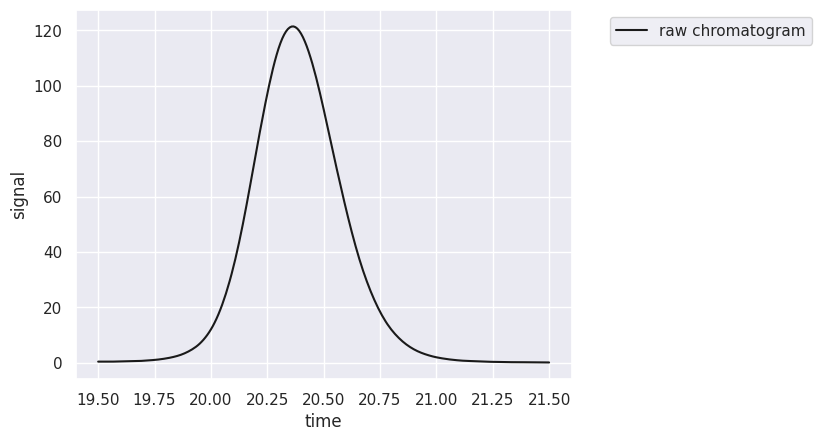

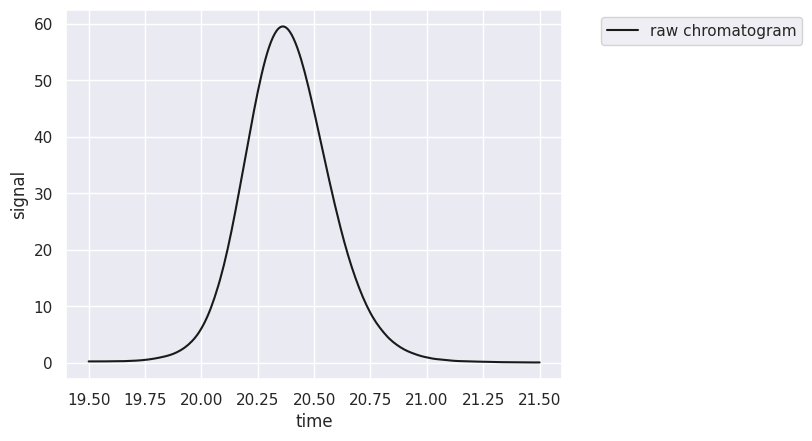

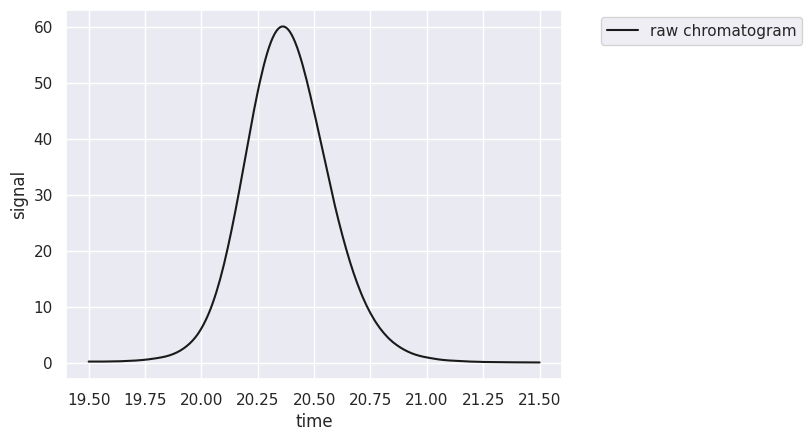

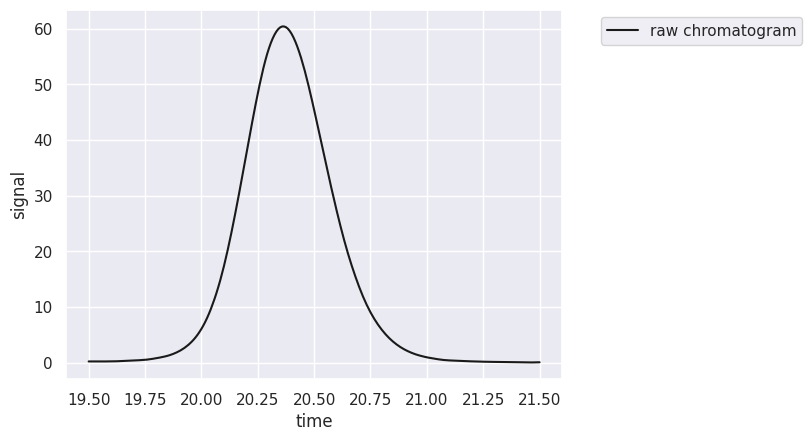

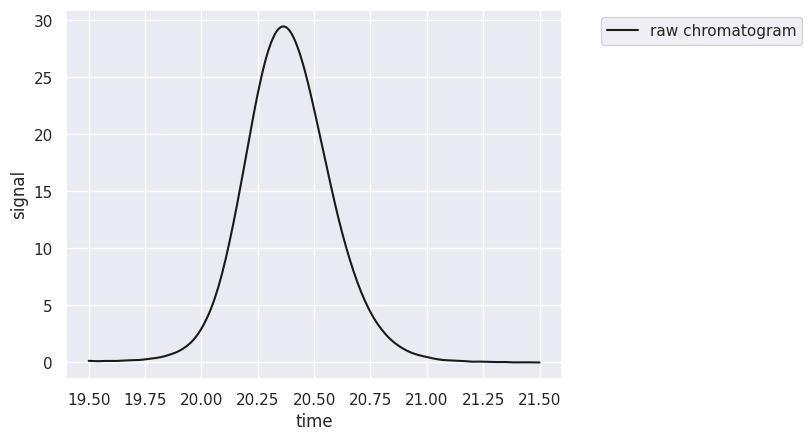

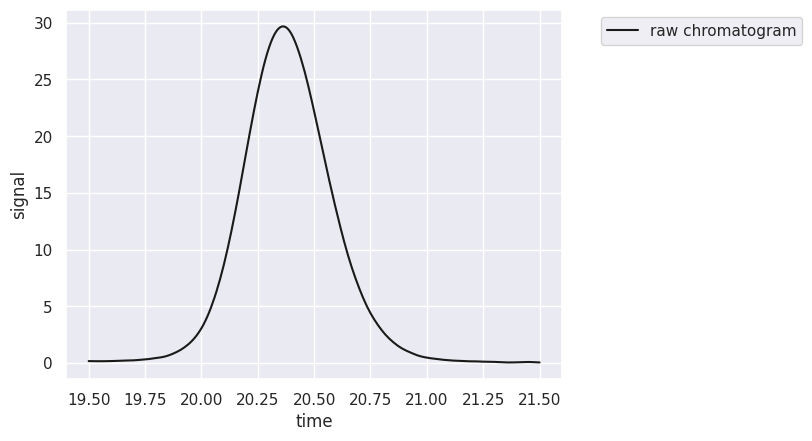

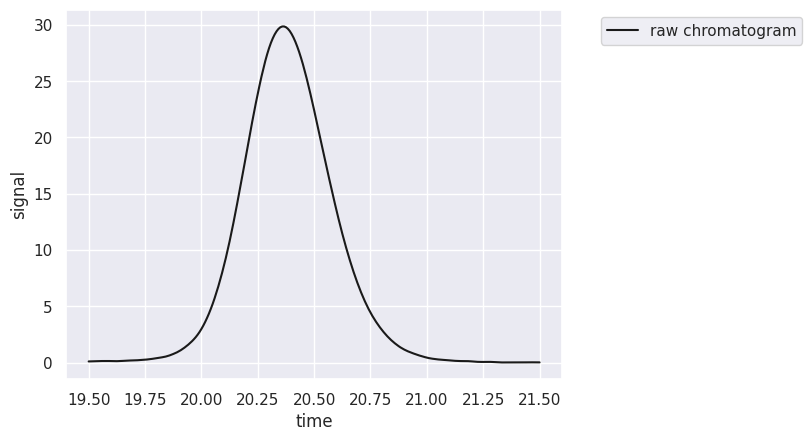

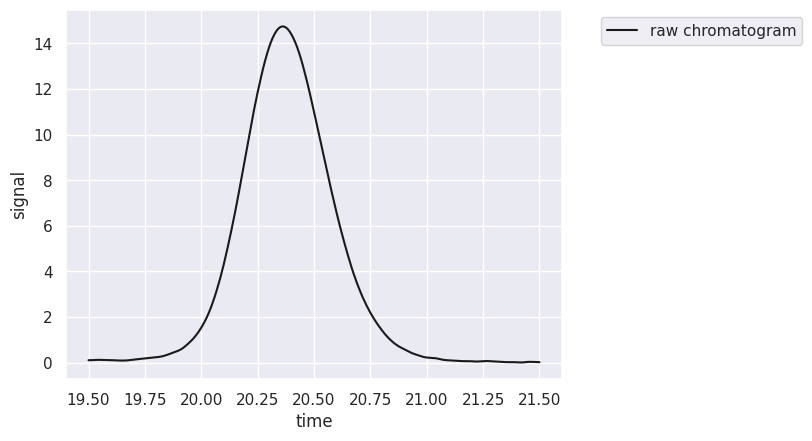

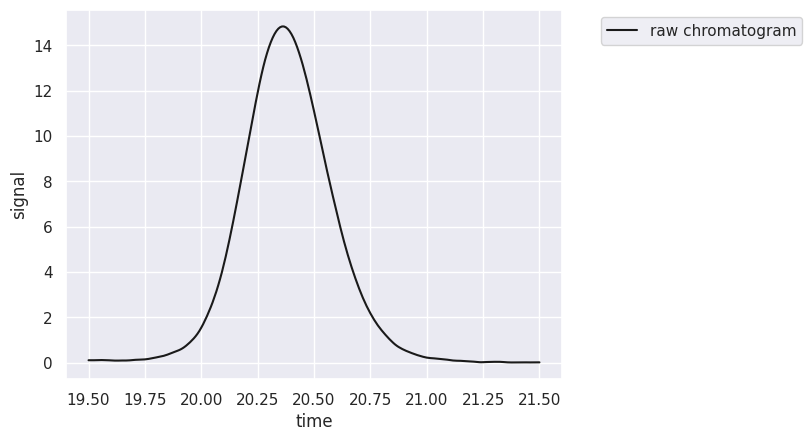

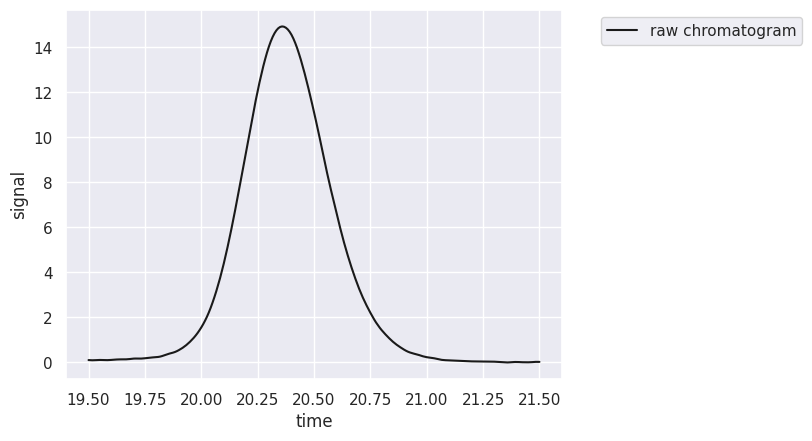

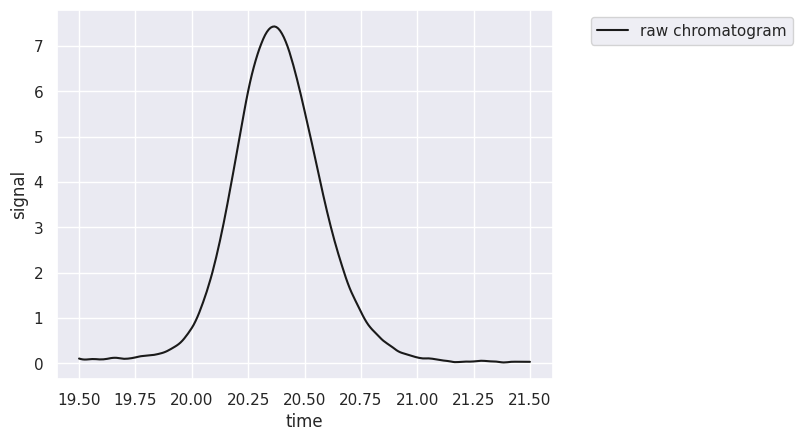

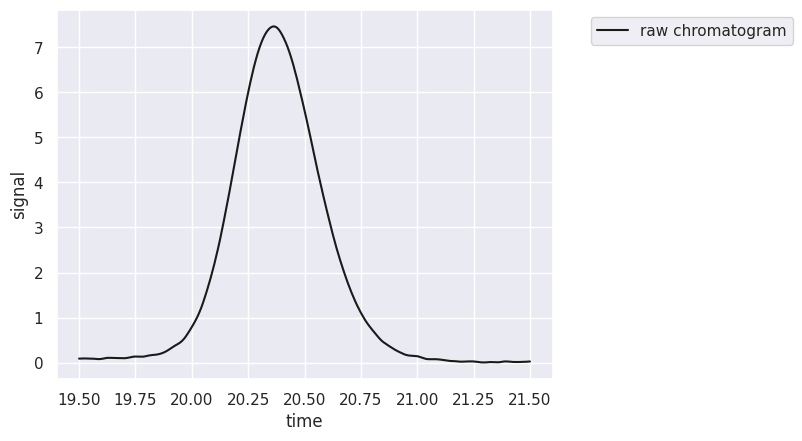

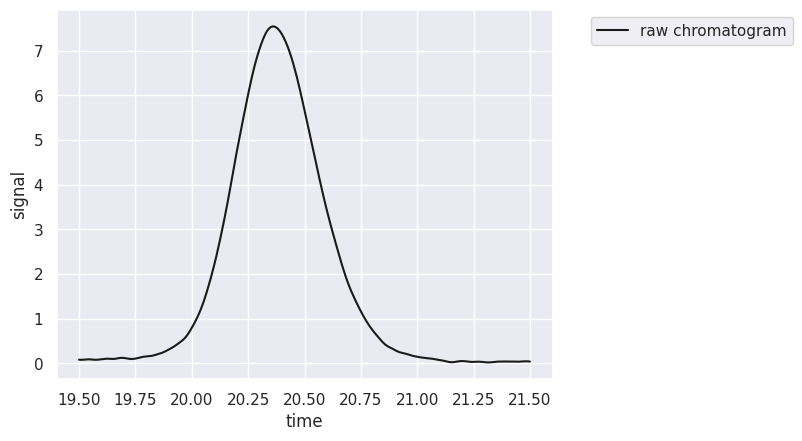

In [45]:
channel = 0
tolerance = .5

lactate = 20.23
acetate = 23.92

calibration = {
        'Lactate': {
            'retention_time': lactate,  # 16.22
            'slope': 927.8522643828225,
            'intercept': 890.6683348447841,
            'unit': 'mM'
        },
        'Acetate': {
            'retention_time': acetate,  # 19.06
            'slope': 475.35276873088804,
            'intercept': 113.11129924177294,
            'unit': 'mM'
        },
    }

all_peaks = None
sample = None

for _, pos, sample, conc, path in files[36:63]:
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    chrom = Chromatogram(df)
    chrom.crop([19.5, 21.5])
    chrom.show()
    peaks = chrom.fit_peaks(
        # buffer=0,
        # prominence=.05, 
        known_peaks=[
            # lactate,
            # succinate,
            # 18.9,
            # acetate,
        ],
        # tolerance=tolerance,
        verbose=True,
    )
    # try:
    #     quant_peaks = chrom.map_peaks(
    #         calibration,
    #         loc_tolerance=tolerance,
    #         include_unmapped=True,
    #     )
    # except ValueError as exc:
    #     print(f"ERROR {pos}: {sample}: ", exc)

    title = f"{pos}: {sample}"
    # print(title)
    if conc is not np.nan:
        title += f" ({conc} mM)"
    # print(peaks.head(100))
    peaks['Name'] = f"{pos}_{sample}"
    peaks['Conc'] = conc
    if all_peaks is None:
        all_peaks = peaks
    else:
        all_peaks = pd.concat([all_peaks, peaks], ignore_index=True)
    # res = title + '\n' + str(peaks.head(100)) + '\n'
    # with open(os.path.join(base_path, '20240311_peak_height_results.txt'), 'a+') as f:
    #     f.write(res)
    # fig = chrom.show()[0]
    # ax = fig.axes[0]
    # for i in [
    #         acetate,
    #         lactate,
    #         succinate,
    #         18.9,
    #     ]:
    #     ax.axvline(i)
    # 
    # fig.suptitle(title)
    # fig.show()
all_peaks.to_csv(os.path.join(base_path, f'{sample}_standard_curve.csv'))

In [3]:
acetate = np.array([
    # 100, 
    # 100, 
    # 100, 
    # 50, 
    # 50, 
    # 50, 
    25, 
    25, 
    25, 
    12.5, 
    12.5, 
    12.5, 
    6.25, 
    6.25, 
    6.25, 
    1.5625, 
    1.5625, 
    1.5625, 
    0.78125, 
    0.78125, 
    0.78125, 
    0.390625, 
    0.390625, 
    0.390625, 
    0.1953125, 
    0.1953125, 
    0.1953125, 
])  # milliMolar
acetate_area = np.array([
    # 47184.6479455545, 
    # 47377.6473926101, 
    # 47599.0396730604, 
    # 24145.1124274276, 
    # 24298.0595320609, 
    # 24414.6688401712, 
    12143.5544055639, 
    12193.0374417833, 
    12254.2712143599, 
    6116.32093686888, 
    6143.72650362822, 
    6176.38795093067, 
    3074.10080507511, 
    3088.40146723884, 
    3104.90919452018, 
    759.884877348602, 
    763.59579878289, 
    767.664910862918, 
    376.544775486246, 
    379.375849958401, 
    381.600025170925, 
    187.520417075968, 
    187.525799971533, 
    187.790454002086, 
    53.1048850754441, 
    83.2469493381569, 
    88.9666243535112, 
])
acetate_regression = stats.linregress(acetate, acetate_area)
print('Acetate\n', acetate_regression)
print()
line = np.arange(0, acetate.max() + 1, 1)  # acetate.max() + 1
yline = [acetate_regression.intercept + acetate_regression.slope * x for x in line]
fig, ax = plt.subplots()
ax.scatter(acetate, acetate_area, label='Measured Acetate')
ax.plot(line, yline, label=f"{acetate_regression.intercept:.5f} + {acetate_regression.slope:.5f} * x\nR^2: {acetate_regression.rvalue:.5f}")
ax.legend()
fig.savefig(os.path.join(base_path, f"acetate_regression.svg"), )
plt.close()

lactate = np.array([
    # 100, 
    # 100, 
    # 100, 
    # 50, 
    # 50, 
    # 50, 
    25, 
    25, 
    25, 
    12.5, 
    12.5, 
    12.5, 
    6.25, 
    6.25, 
    6.25, 
    3.125, 
    3.125, 
    3.125, 
    1.5625, 
    1.5625, 
    1.5625, 
    0.78125, 
    0.78125, 
    0.78125, 
    0.390625, 
    0.390625, 
    0.390625, 
]) # milliMolar
lactate_area = np.array([
    # 91365.7411980947, 
    # 91732.2397922142, 
    # 92151.0403171581, 
    # 50033.1201969929, 
    # 50343.2045757585, 
    # 50605.2874511449, 
    25545.8127513815, 
    25664.0326230384, 
    25812.8715232886, 
    12892.1780673649, 
    12952.50391773, 
    13022.3232139195, 
    6461.96450863091, 
    6494.67026447839, 
    6539.9815697626, 
    3204.71621576364, 
    3224.22278405646, 
    3251.13735594669, 
    1585.75125268769, 
    1595.08164279911, 
    1606.07098074551, 
    791.000385477556, 
    795.31777492526, 
    801.590042526959, 
    397.46223474318, 
    399.038580143967, 
    403.715577404774, 
])
lactate_regression = stats.linregress(lactate, lactate_area)
print('Lactate\n', lactate_regression)
print()
line = np.arange(0, lactate.max() + 1, 1)  # acetate.max() + 1
yline = [lactate_regression.intercept + lactate_regression.slope * x for x in line]
fig, ax = plt.subplots()
ax.scatter(lactate, lactate_area, label='Measured Lactate')
ax.plot(line, yline, label=f"{lactate_regression.intercept:.5f} + {lactate_regression.slope:.5f} * x\nR^2: {lactate_regression.rvalue:.5f}")
ax.legend()
fig.savefig(os.path.join(base_path, f"lactate_regression.svg"))
plt.close()

Acetate
 LinregressResult(slope=488.6807521220283, intercept=3.673185639617259, rvalue=0.9999738562996849, pvalue=3.815749239568887e-42, stderr=0.810691230120762, intercept_stderr=8.793317553168304)

Lactate
 LinregressResult(slope=1028.220477627565, intercept=19.68178547145908, rvalue=0.9999698419066835, pvalue=1.482255093926464e-41, stderr=1.8320453076548768, intercept_stderr=19.988643059758417)


In [ ]:
channel = 0
tolerance = .5

lactate = 20.36
acetate = 23.9

calibration = {
        'Lactate': {
            'retention_time': lactate,  # 16.22
            'slope': lactate_regression.slope,
            'intercept': lactate_regression.intercept,
            'unit': 'mM'
        },
        'Acetate': {
            'retention_time': acetate,  # 19.06
            'slope': acetate_regression.slope,
            'intercept': acetate_regression.intercept,
            'unit': 'mM'
        },
    }
all_peaks = None
for id_sample, pos, sample, conc, path in files[63:72]:
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    chrom = Chromatogram(df)
    # chrom.crop([19., 25])  # 19.5, 25
    # chrom.show()
    peaks = chrom.fit_peaks(
        # buffer=0,
        # prominence=.05, 
        known_peaks=[
            # lactate,
            # succinate,
            # 18.9,
            # acetate,
        ],
        # tolerance=tolerance,
        verbose=True,
    )
    try:
        quant_peaks = chrom.map_peaks(
            calibration,
            loc_tolerance=tolerance,
            include_unmapped=True,
        )
    except ValueError as exc:
        print(f"ERROR {pos}: {sample}: ", exc)

    title = f"{pos}: {sample}"
    # print(title)
    if conc is not np.nan:
        title += f" ({conc} mM)"

    res = title + '\n' + str(peaks.head(100)) + '\n'
    fig = chrom.show()[0]
    ax = fig.axes[0]
    for i in [
            acetate,
            lactate,
            # 18.9,
        ]:
        ax.axvline(i)
    peaks['Name'] = f"{pos}_{sample}"
    peaks['Conc'] = conc
    if all_peaks is None:
        all_peaks = peaks
    else:
        all_peaks = pd.concat([all_peaks, peaks], ignore_index=True)
    res = title + '\n' + str(peaks.head(100)) + '\n'
    # with open(os.path.join(base_path, '20240311_peak_niko_height_results.txt'), 'a+') as f:
    #     f.write(res)
    print(peaks)

    fig.suptitle(title)
    # fig.savefig(os.path.join(base_path, 'curves', f"{id_sample}_full_{title}.svg"), bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()